In [1]:
import tensorflow as tf
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization
tf.__version__

'2.11.0'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/Computer Vision Masterclass/Datasets/fer_images.zip"
zip_object = zipfile.ZipFile(file = path,mode= 'r')
zip_object.extractall('./')
zip_object.close()

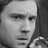

In [4]:
tf.keras.preprocessing.image.load_img('/content/fer2013/train/Angry/0.jpg')

In [5]:
#Data augumentation
training_generator = ImageDataGenerator(rescale = 1./255,rotation_range = 7,horizontal_flip = True,zoom_range =0.2)
train_dataset = training_generator.flow_from_directory('/content/fer2013/train',target_size = (48,48),batch_size=16,class_mode= 'categorical',shuffle = True)

Found 28709 images belonging to 7 classes.


In [6]:
train_dataset.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [7]:
np.unique(train_dataset.classes,return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([3995,  436, 4097, 7215, 4965, 4830, 3171]))

In [8]:
train_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

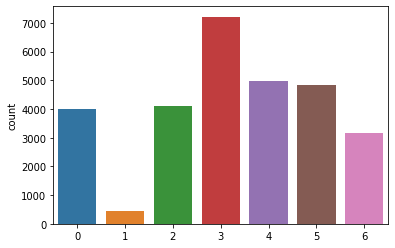

In [9]:
sns.countplot(x=train_dataset.classes)

In [10]:
testing_generator = ImageDataGenerator(rescale = 1./255)
test_dataset = testing_generator.flow_from_directory('/content/fer2013/validation',target_size = (48,48),batch_size=1,class_mode= 'categorical',shuffle = True)

Found 3589 images belonging to 7 classes.


In [11]:
num_detectors = 32
num_classes = 7
width,height = 48,48
epochs = 100
network = Sequential()

network.add(Conv2D(num_detectors,(3,3),activation='relu',padding='same',input_shape = (width,height,3)))
network.add(BatchNormalization())
network.add(Conv2D(num_detectors,(3,3),activation='relu',padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size =(2,2)))
network.add(Dropout(0.2))


network.add(Conv2D(2*num_detectors,(3,3),activation='relu',padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(2*num_detectors,(3,3),activation='relu',padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size =(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*2*num_detectors,(3,3),activation='relu',padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(2*2*num_detectors,(3,3),activation='relu',padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size =(2,2)))
network.add(Dropout(0.2))


network.add(Conv2D(2*2*2*num_detectors,(3,3),activation='relu',padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(2*2*2*num_detectors,(3,3),activation='relu',padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size =(2,2)))
network.add(Dropout(0.2))

network.add(Flatten())

network.add(Dense(2*num_detectors,activation = 'relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(num_classes,activation='softmax'))
print(network.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                        

In [ ]:
network.compile(optimizer ='Adam',loss='categorical_crossentropy',metrics = ['accuracy'])

In [12]:
with open('/content/drive/MyDrive/Computer Vision Masterclass/Weights/network_emotions.json','r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 48, 48, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_8_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_8", "trainable": true, "batch_input_shape": [null, 48, 48, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "BatchNormalization", "config": {"name": "batch_normalization_8", "trainable": true, "dtype": "float32", "axis": [3], "momentum": 0.99, "epsilon": 0

In [13]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('/content/drive/MyDrive/Computer Vision Masterclass/Weights/weights_emotions.hdf5')
network_loaded.compile(optimizer ='Adam',loss='categorical_crossentropy',metrics = ['accuracy'])

In [14]:
network_loaded.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 batch_normalization_8 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_9 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                      

In [15]:
network_loaded.evaluate(test_dataset)

3589/3589 [==============================] - 27s 6ms/step - loss: 1.5148 - accuracy: 0.5779


[1.5148460865020752, 0.5778768658638]

In [16]:
predictions =network_loaded.predict(test_dataset)
predictions

3589/3589 [==============================] - 13s 4ms/step


array([[2.1928059e-01, 1.8229851e-04, 7.6943479e-02, ..., 2.9442751e-01,
        4.0606147e-01, 1.1553045e-05],
       [3.6875311e-01, 1.9714236e-03, 3.3671325e-01, ..., 1.9386512e-01,
        7.0346400e-02, 2.1605918e-02],
       [1.4708760e-01, 2.8942267e-03, 5.6255049e-01, ..., 6.9664441e-02,
        2.1497978e-01, 1.6199645e-03],
       ...,
       [1.9389858e-02, 2.7363286e-03, 2.7836276e-02, ..., 2.4321876e-02,
        9.2325217e-01, 2.2384695e-05],
       [4.2506633e-03, 3.1793170e-05, 3.8733397e-02, ..., 2.7240890e-01,
        6.8408263e-01, 4.1126731e-04],
       [1.7807284e-01, 4.0415456e-05, 7.5767356e-01, ..., 2.1689178e-03,
        1.4966655e-02, 1.5236300e-03]], dtype=float32)

In [17]:
pred = np.argmax(predictions, axis = 1)
pred

array([5, 0, 2, ..., 5, 5, 2])

In [18]:
test_dataset.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [20]:
accuracy_score(test_dataset.classes,pred)

0.18473112287545276

In [21]:
cm = confusion_matrix(test_dataset.classes,pred)
cm

array([[ 74,   5,  70, 144,  56,  85,  57],
       [ 15,   0,   6,  10,   6,  14,   4],
       [ 71,   9,  83, 156,  73,  73,  63],
       [116,  18, 125, 249, 101, 159, 111],
       [ 81,  11,  79, 181,  99, 107,  68],
       [ 78,  12,  88, 159,  72, 107,  78],
       [ 50,   9,  57, 120,  58,  71,  51]])

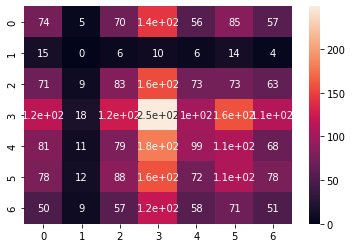

In [22]:
sns.heatmap(cm, annot = True)

In [23]:
print(classification_report(test_dataset.classes,pred))

              precision    recall  f1-score   support

           0       0.15      0.15      0.15       491
           1       0.00      0.00      0.00        55
           2       0.16      0.16      0.16       528
           3       0.24      0.28      0.26       879
           4       0.21      0.16      0.18       626
           5       0.17      0.18      0.18       594
           6       0.12      0.12      0.12       416

    accuracy                           0.18      3589
   macro avg       0.15      0.15      0.15      3589
weighted avg       0.18      0.18      0.18      3589



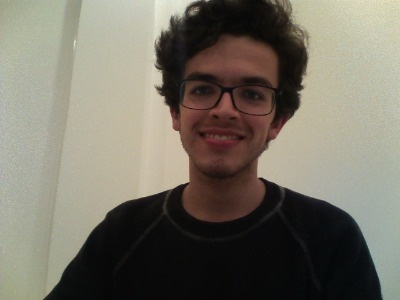

In [37]:
image = cv2.imread('/content/drive/MyDrive/Computer Vision Masterclass/Images/gabriel.png')
cv2_imshow(image)

In [38]:
image.shape

(300, 400, 3)

To identify the emotion only face has to be send to the model and not the whole picture

In [39]:
face_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Computer Vision Masterclass/Cascades/haarcascade_frontalface_default.xml')

In [40]:
original_image = image.copy()
faces = face_detector.detectMultiScale(original_image)


In [41]:
faces

array([[162,  40, 128, 128]], dtype=int32)

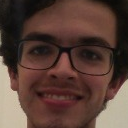

In [42]:
roi = image[40:40+128,162:162+128]
cv2_imshow(roi)

In [43]:
roi.shape

(128, 128, 3)

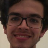

In [45]:
roi = cv2.resize(roi,(48,48))
cv2_imshow(roi)

In [47]:
roi.shape

(48, 48, 3)

In [48]:
roi

array([[[ 28,  32,  37],
        [ 22,  28,  34],
        [ 33,  37,  42],
        ...,
        [ 12,  16,  17],
        [ 16,  21,  25],
        [ 16,  25,  30]],

       [[ 27,  31,  36],
        [ 31,  36,  41],
        [ 32,  36,  41],
        ...,
        [ 11,  16,  19],
        [ 13,  19,  24],
        [ 17,  25,  28]],

       [[ 27,  31,  36],
        [ 30,  34,  39],
        [ 26,  30,  35],
        ...,
        [ 12,  17,  20],
        [ 14,  20,  25],
        [ 20,  25,  27]],

       ...,

       [[162, 185, 197],
        [166, 188, 200],
        [166, 188, 200],
        ...,
        [162, 181, 188],
        [162, 182, 188],
        [161, 180, 187]],

       [[160, 184, 196],
        [165, 187, 199],
        [166, 188, 200],
        ...,
        [161, 180, 187],
        [162, 181, 187],
        [161, 180, 187]],

       [[160, 184, 196],
        [163, 187, 199],
        [165, 187, 199],
        ...,
        [160, 179, 186],
        [161, 180, 187],
        [162, 181, 188]]

In [49]:
roi = roi / 255
roi

array([[[0.10980392, 0.1254902 , 0.14509804],
        [0.08627451, 0.10980392, 0.13333333],
        [0.12941176, 0.14509804, 0.16470588],
        ...,
        [0.04705882, 0.0627451 , 0.06666667],
        [0.0627451 , 0.08235294, 0.09803922],
        [0.0627451 , 0.09803922, 0.11764706]],

       [[0.10588235, 0.12156863, 0.14117647],
        [0.12156863, 0.14117647, 0.16078431],
        [0.1254902 , 0.14117647, 0.16078431],
        ...,
        [0.04313725, 0.0627451 , 0.0745098 ],
        [0.05098039, 0.0745098 , 0.09411765],
        [0.06666667, 0.09803922, 0.10980392]],

       [[0.10588235, 0.12156863, 0.14117647],
        [0.11764706, 0.13333333, 0.15294118],
        [0.10196078, 0.11764706, 0.1372549 ],
        ...,
        [0.04705882, 0.06666667, 0.07843137],
        [0.05490196, 0.07843137, 0.09803922],
        [0.07843137, 0.09803922, 0.10588235]],

       ...,

       [[0.63529412, 0.7254902 , 0.77254902],
        [0.65098039, 0.7372549 , 0.78431373],
        [0.65098039, 0

In [50]:
roi.shape

(48, 48, 3)

In [51]:
#adding batch in the shape
roi =np.expand_dims(roi,axis = 0)
roi.shape

(1, 48, 48, 3)

In [52]:
probs = network_loaded.predict(roi)
probs

1/1 [==============================] - 0s 257ms/step


array([[5.2841782e-04, 1.1444075e-06, 1.2489490e-03, 8.9390194e-01,
        1.0206461e-01, 2.1787002e-03, 7.6220604e-05]], dtype=float32)

In [53]:
result = np.argmax(probs)

In [54]:
result

3

In [55]:
test_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

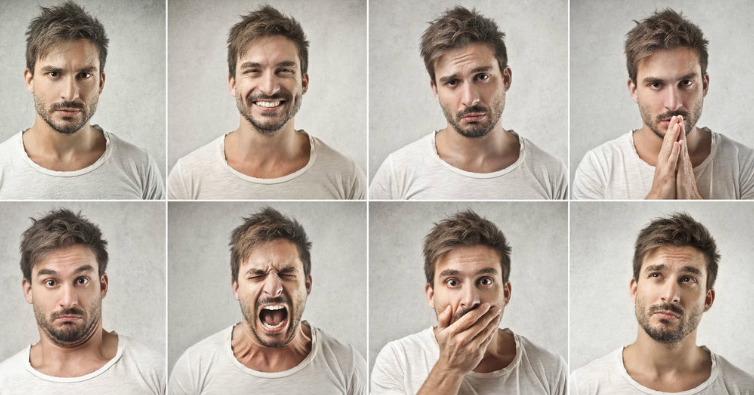

In [76]:
image = cv2.imread('/content/drive/MyDrive/Computer Vision Masterclass/Images/faces_emotions.png')
cv2_imshow(image)

In [77]:
faces = face_detector.detectMultiScale(image)
faces

array([[224,  35,  90,  90],
       [ 23,  41,  92,  92],
       [420,  43,  97,  97],
       [625,  49,  91,  91],
       [420, 242,  97,  97],
       [ 18, 243,  98,  98],
       [229, 242,  85,  85],
       [627, 241,  91,  91]], dtype=int32)

In [78]:
test_dataset.class_indices.keys()

dict_keys(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])

In [79]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

1/1 [==============================] - 0s 25ms/step


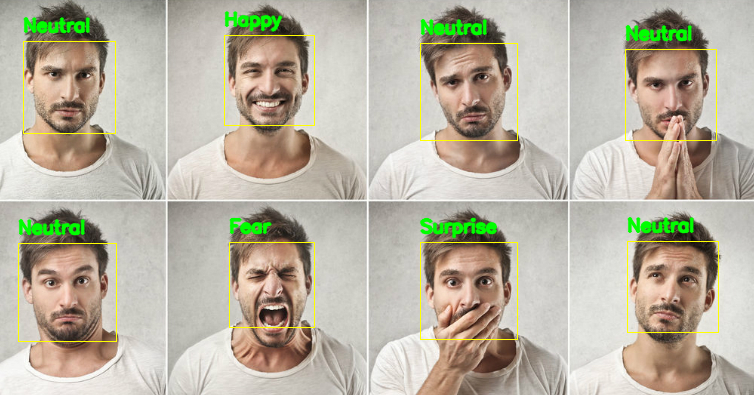

In [80]:
for (x,y,w,h) in faces:
  cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,255),1)
  roi = image[y:y+h,x:x+w]
  # cv2_imshow(roi)
  roi = cv2.resize(roi,(48,48))
  roi = roi /255
  roi = np.expand_dims(roi,axis = 0)
  # print(roi.shape)
  prediction = network_loaded.predict(roi)
  # print(prediction)
  cv2.putText(image , emotions[np.argmax(prediction)], (x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.6,(0,255,0),2,cv2.LINE_AA)
cv2_imshow(image) 

In [81]:
cap = cv2.VideoCapture('/content/drive/MyDrive/Computer Vision Masterclass/Videos/emotion_test01.mp4')
connected,video = cap.read()
print(connected,video.shape)

True (360, 640, 3)


In [82]:
save_path = '/content/drive/MyDrive/Computer Vision Masterclass/Videos/emotion_test01_result.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = 24
output_video = cv2.VideoWriter(save_path,fourcc,fps,(video.shape[1],video.shape[0]))

In [84]:
while (cv2.waitKey(1) < 0):
  connected,frame = cap.read()
  if not connected:
    break
  faces = face_detector.detectMultiScale(frame)
  if len(faces) > 0:
      for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),1)
        roi = frame[y:y+h,x:x+w]
        roi = cv2.resize(roi,(48,48))
        roi = roi /255
        roi = np.expand_dims(roi,axis = 0)
        prediction = network_loaded.predict(roi)
        if prediction is not None:
          result = np.argmax(prediction)
          cv2.putText(frame , emotions[np.argmax(prediction)], (x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.6,(0,255,0),2,cv2.LINE_AA)
  cv2_imshow(frame)
output_video.release()
cv2.destroyWindows()

Output hidden; open in https://colab.research.google.com to view.